# EDA

## Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity


In [2]:
import os
import sys
from pathlib import Path

path = Path(os.path.dirname(os.getcwd()))
path = str(path)
print(path)
sys.path.insert(1, path)

/Users/saideepbunny/Projects/Application_Ranking_System


## Reading the data

In [3]:
# df1 = pd.read_csv(f"{path}/data/kaggle_linkedin_jd_skills_dataset/job_skills.csv")
# df2 = pd.read_csv(f"{path}/data/kaggle_linkedin_jd_skills_dataset/job_summary.csv")
df = pd.concat([pd.read_csv(f"{path}/data/synthetic_data/synthetic_jd_resume_set3.csv"),
                pd.read_csv(f"{path}/data/synthetic_data/synthetic_jd_resume_set2.csv"),
                pd.read_csv(f"{path}/data/synthetic_data/synthetic_jd_resume_set1.csv")])
df

,id,job_title,company,job_skills,job_summary,category,resume_text
0,866062,Master Scheduler,Baltimore Aircoil Company,"Operations, Supply Chain, MRP systems, SAP ERP...","Baltimore Aircoil Company (BAC), an Amsted Ind...",Complete Mismatch,# *John Miller*\n\n**Professional Summary**\n\...
1,866062,Master Scheduler,Baltimore Aircoil Company,"Operations, Supply Chain, MRP systems, SAP ERP...","Baltimore Aircoil Company (BAC), an Amsted Ind...",Underwhelming,# James Casey\n\n## Professional Summary\n\nHi...
2,866062,Master Scheduler,Baltimore Aircoil Company,"Operations, Supply Chain, MRP systems, SAP ERP...","Baltimore Aircoil Company (BAC), an Amsted Ind...",Good Fit,# Rachel Vargas\n\n## Professional Summary\n\n...
3,866062,Master Scheduler,Baltimore Aircoil Company,"Operations, Supply Chain, MRP systems, SAP ERP...","Baltimore Aircoil Company (BAC), an Amsted Ind...",Overqualified,# Susan Bradley\n\n**Professional Summary**\n\...
4,531893,Master Technician,A. O. Smith Corporation,"Engineering, Product Development, Innovation, ...",Company / Location Information\nWater technolo...,Complete Mismatch,# Sean Johnson\n\n## Professional Summary\n\nD...
...,...,...,...,...,...,...,...
1995,440051,Account Executive Digital Sales,Salem Media Group,"Sales, Account Executive, Media Strategist, Bu...",Overview\nSalem Media - Washington D.C.\noffer...,Overqualified,# Todd Walters\n\n**Professional Summary**\n\n...
1996,435981,"Account Executive, Industrial Equipment",Better Talent Advisors,"Sales, Territory Management, Variable Frequenc...","With over 100 years in business, our family of...",Complete Mismatch,**DOUGLAS BLAKE**\n\n**Professional Summary**\...
1997,435981,"Account Executive, Industrial Equipment",Better Talent Advisors,"Sales, Territory Management, Variable Frequenc...","With over 100 years in business, our family of...",Underwhelming,# Kyle Villegas\n\n## Professional Summary\n\n...
1998,435981,"Account Executive, Industrial Equipment",Better Talent Advisors,"Sales, Territory Management, Variable Frequenc...","With over 100 years in business, our family of...",Good Fit,# Charles Preston\n\n**Professional Summary**\...


In [4]:
df['id'].nunique()

1500

In [5]:
print("Number of rows in the dataset:", df.shape[0])
print("Number of columns in the dataset:", df.shape[1])

Number of rows in the dataset: 6000
Number of columns in the dataset: 7


### Overview of the data

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           6000 non-null   int64 
 1   job_title    6000 non-null   object
 2   company      6000 non-null   object
 3   job_skills   6000 non-null   object
 4   job_summary  6000 non-null   object
 5   category     6000 non-null   object
 6   resume_text  6000 non-null   object
dtypes: int64(1), object(6)
memory usage: 375.0+ KB


### Null value report

In [7]:
def null_value_report(df):
    missing = pd.DataFrame(df.isna().sum()).reset_index().rename(columns={"index": "column", 0:"Count"})
    missing['Percentage'] = missing['Count'] / df.shape[0] * 100
    display(missing)

In [8]:
null_value_report(df)

,column,Count,Percentage
0,id,0,0.0
1,job_title,0,0.0
2,company,0,0.0
3,job_skills,0,0.0
4,job_summary,0,0.0
5,category,0,0.0
6,resume_text,0,0.0


## Categorizing columns

In [9]:
def get_cardinality(df):
    unique = pd.DataFrame(df.nunique()).reset_index().rename(columns={"index": "column", 0:"Count"})
    unique['Unique Percentage'] = unique['Count'] / df.shape[0] * 100
    display(unique)

In [10]:
# get_cardinality(df)

In [11]:
ignore_columns = ["id"]
numerical_columns = []

categorical_columns = ["category", "job_title", "company"]
text_columns = ["job_skills", "job_summary", "resume_text"]

In [12]:
assert(len(numerical_columns + categorical_columns + text_columns + ignore_columns) == df.shape[1])

In [13]:
print("Number of Numerical columns:", len(numerical_columns))
print("Number of Categorical columns:", len(categorical_columns))
print("Number of Text columns:", len(text_columns))

Number of Numerical columns: 0
Number of Categorical columns: 3
Number of Text columns: 3


## EDA

### Numerical columns

In [14]:
#There are no numerical fields

#### Histograms

In [15]:
def plot_histogram(df, col, log_scale=True):
    sns.set_style("darkgrid")
    sns.histplot(data = df, x=col, bins=20)
    plt.title(f"Distribution of {col}")
    if(log_scale):
        plt.yscale("log")
    plt.show()

### Categorical columns

#### Null value report

In [16]:
null_value_report(df[categorical_columns])

,column,Count,Percentage
0,category,0,0.0
1,job_title,0,0.0
2,company,0,0.0


#### Statistics

In [17]:
df[categorical_columns].describe(include=['object'])

,category,job_title,company
count,6000,6000,6000
unique,4,1008,1088
top,Complete Mismatch,Senior Embedded Software Engineer,Recruiting from Scratch
freq,1500,168,328


#### Count plots

In [18]:
def plot_count(df, col):
    sns.set_style('darkgrid')
    
    # 1. Create a DataFrame for the **global** category percentages
    percentage_df = (
        df[col]
        .value_counts(normalize=True)  # Proportion of each category
        .mul(100)                      # Convert to percentage
        .rename("percentage")          # Name the column "percentage"
        .reset_index()                 # Convert series to DataFrame
        .rename(columns={"index": col}) # Rename the index column to our category name
    )
    
    # 2. Get the top 20 most frequent categories in the entire dataset
    top_categories = df[col].value_counts().nlargest(20).index.tolist()
    
    # 3. Filter the original DataFrame to include only those top 20 categories
    filtered_df = df[df[col].isin(top_categories)]
    
    # 4. Create the countplot using `order=top_categories`
    plt.figure(figsize=(10, 6))
    ax = sns.countplot(data=filtered_df, y=col, order=top_categories, palette="Set1")
    
    # 5. Annotate each bar with the **global** percentage
    for i, patch in enumerate(ax.patches):
        # The i-th patch corresponds to the i-th category in `top_categories`
        category = top_categories[i]
        
        # Retrieve the global percentage for this category from the percentage_df
        pct_value = percentage_df.loc[percentage_df[col] == category, "percentage"].values[0]
        
        # Bar dimensions
        bar_length = patch.get_width()  # How long the bar is (i.e., the count in `filtered_df`)
        y_center = patch.get_y() + patch.get_height() / 2  # Vertical center of the bar

        # Place the annotation a bit to the right of the bar
        ax.annotate(f"{pct_value:.1f}%", (bar_length, y_center), xytext=(5, 0), textcoords="offset points", ha="left", va="center", fontsize=10, color="black")

    # 6. Final touches: title, labels, layout
    plt.title(f"Top 20 Most Frequent Categories - {col}", fontsize=16)
    plt.xlabel("Count", fontsize=14)
    plt.ylabel(col, fontsize=14)
    plt.tight_layout()
    plt.show()

/var/folders/t5/tflj5hjs197_vv37fw2sdhdr0000gn/T/ipykernel_74899/8671764.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=filtered_df, y=col, order=top_categories, palette="Set1")


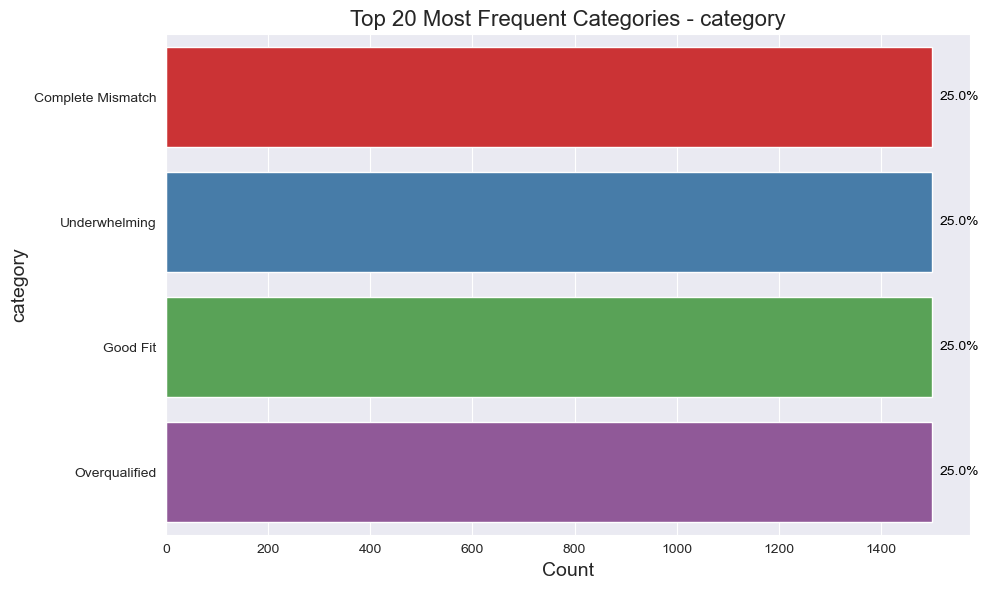

/var/folders/t5/tflj5hjs197_vv37fw2sdhdr0000gn/T/ipykernel_74899/8671764.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=filtered_df, y=col, order=top_categories, palette="Set1")


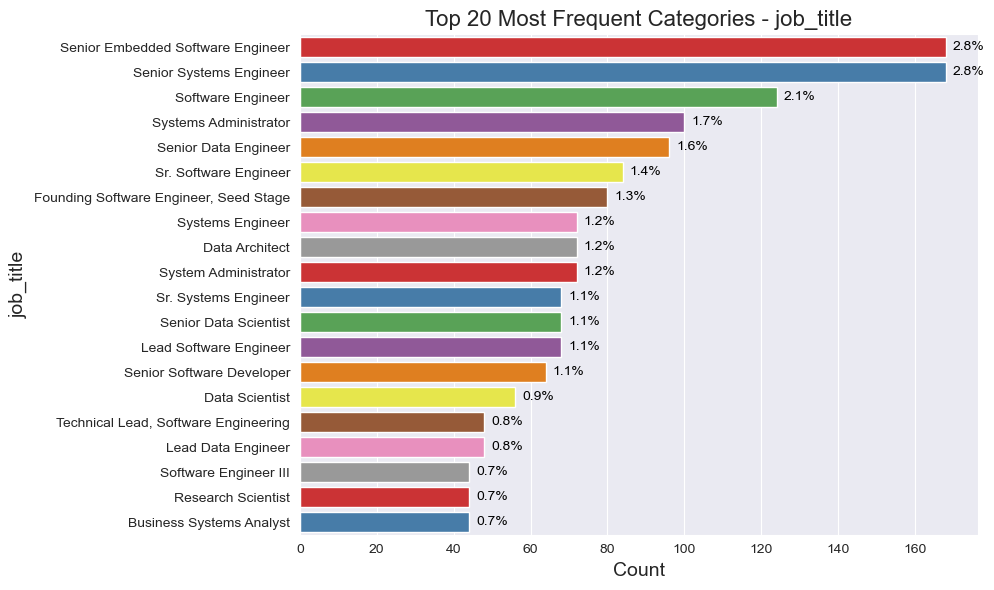

/var/folders/t5/tflj5hjs197_vv37fw2sdhdr0000gn/T/ipykernel_74899/8671764.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=filtered_df, y=col, order=top_categories, palette="Set1")


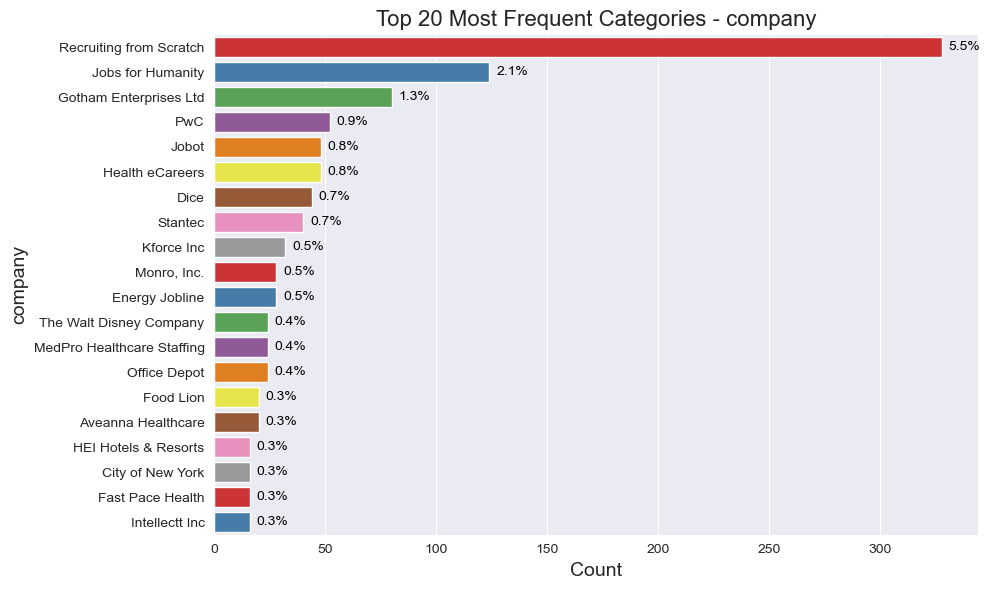

In [19]:
for i in categorical_columns:
    if(df[i].nunique() / df.shape[0] < 0.9):
        plot_count(df, i)

### Text columns

#### Null value report

In [20]:
null_value_report(df[text_columns])

,column,Count,Percentage
0,job_skills,0,0.0
1,job_summary,0,0.0
2,resume_text,0,0.0


#### Text lengths

In [21]:
temp = df[text_columns+['category']].fillna("").copy()
for i in text_columns:
    temp[f"{i}_len"] = temp[i].apply(lambda x: len(x))
    
temp[text_columns + [f"{i}_len" for i in text_columns]]

,job_skills,job_summary,resume_text,job_skills_len,job_summary_len,resume_text_len
0,"Operations, Supply Chain, MRP systems, SAP ERP...","Baltimore Aircoil Company (BAC), an Amsted Ind...",# *John Miller*\n\n**Professional Summary**\n\...,1245,5864,3809
1,"Operations, Supply Chain, MRP systems, SAP ERP...","Baltimore Aircoil Company (BAC), an Amsted Ind...",# James Casey\n\n## Professional Summary\n\nHi...,1245,5864,2610
2,"Operations, Supply Chain, MRP systems, SAP ERP...","Baltimore Aircoil Company (BAC), an Amsted Ind...",# Rachel Vargas\n\n## Professional Summary\n\n...,1245,5864,3150
3,"Operations, Supply Chain, MRP systems, SAP ERP...","Baltimore Aircoil Company (BAC), an Amsted Ind...",# Susan Bradley\n\n**Professional Summary**\n\...,1245,5864,3885
4,"Engineering, Product Development, Innovation, ...",Company / Location Information\nWater technolo...,# Sean Johnson\n\n## Professional Summary\n\nD...,556,4514,3131
...,...,...,...,...,...,...
1995,"Sales, Account Executive, Media Strategist, Bu...",Overview\nSalem Media - Washington D.C.\noffer...,# Todd Walters\n\n**Professional Summary**\n\n...,781,2451,3545
1996,"Sales, Territory Management, Variable Frequenc...","With over 100 years in business, our family of...",**DOUGLAS BLAKE**\n\n**Professional Summary**\...,501,2130,2701
1997,"Sales, Territory Management, Variable Frequenc...","With over 100 years in business, our family of...",# Kyle Villegas\n\n## Professional Summary\n\n...,501,2130,2847
1998,"Sales, Territory Management, Variable Frequenc...","With over 100 years in business, our family of...",# Charles Preston\n\n**Professional Summary**\...,501,2130,3137


In [22]:
temp["num_of_skills"] = temp["job_skills"].apply(lambda x: len(x.split(",")))

#### Text length statistics

In [23]:
temp[[f"{i}_len" for i in text_columns] + ["num_of_skills"]].describe(percentiles=[0.05, 0.25, 0.5, 0.75, 0.95]).round(2)

,job_skills_len,job_summary_len,resume_text_len,num_of_skills
count,6000.00,6000.00,6000.00,6000.00
mean,781.29,4984.44,3340.98,40.16
std,355.31,1403.86,705.98,13.17
min,254.00,2006.00,1745.00,30.00
5%,438.95,2469.60,2418.00,30.00
25%,564.75,3819.75,2850.75,32.00
50%,685.00,5273.00,3253.00,36.00
75%,889.00,6198.00,3687.00,44.00
95%,1414.15,6850.45,4614.30,63.00
max,4694.00,6998.00,7588.00,161.00


#### Text length histograms

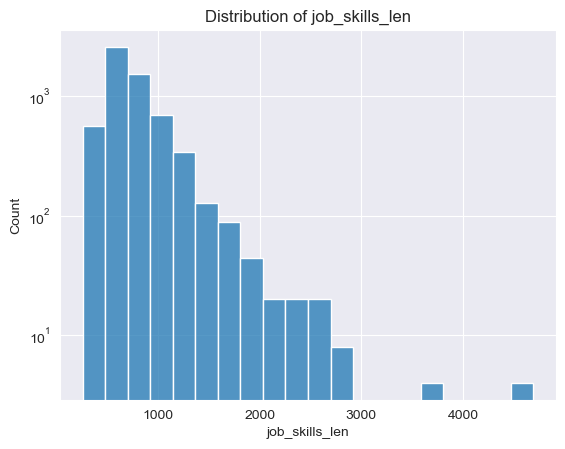

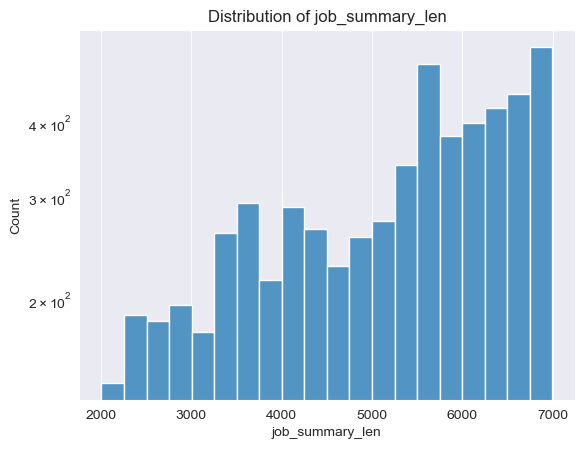

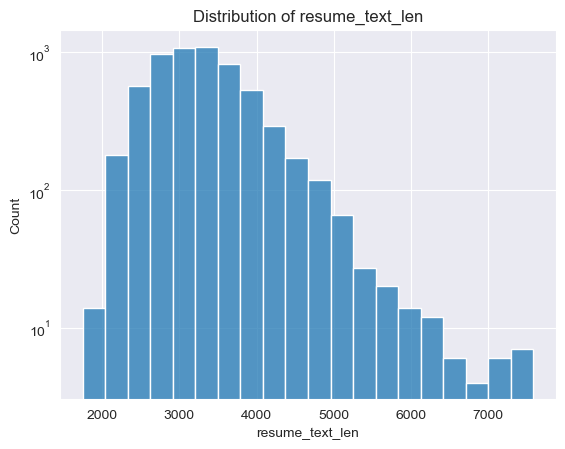

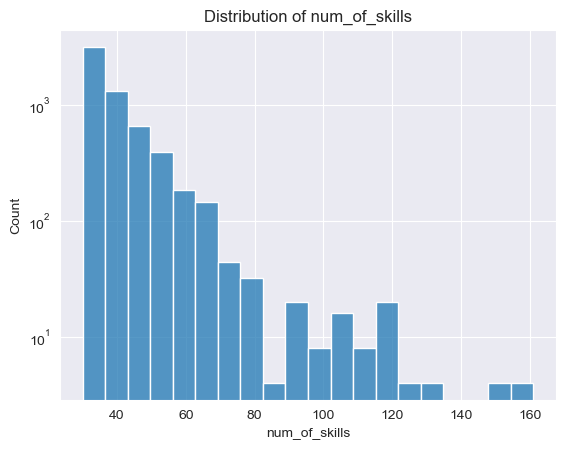

In [24]:
for i in [f"{i}_len" for i in text_columns] + ["num_of_skills"]:
    plot_histogram(temp, i)

## WordClouds

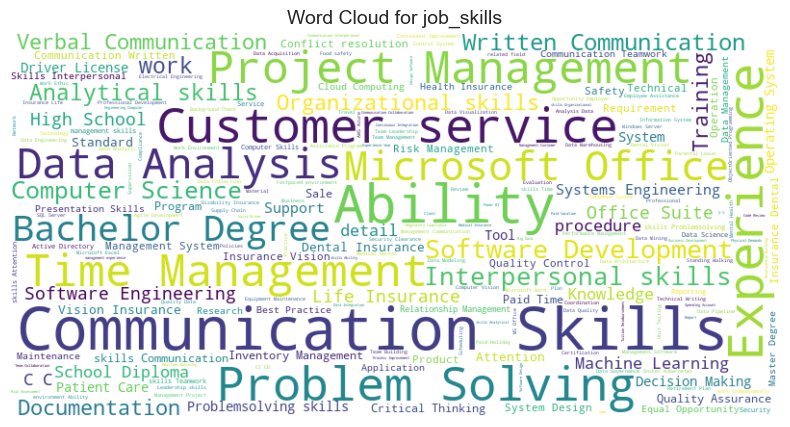

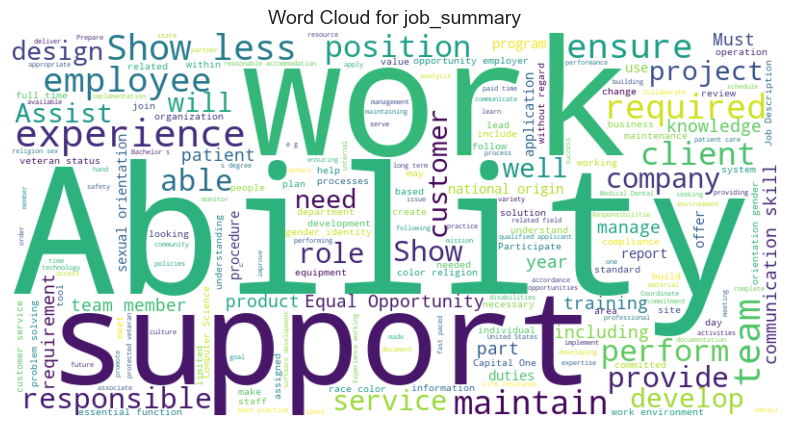

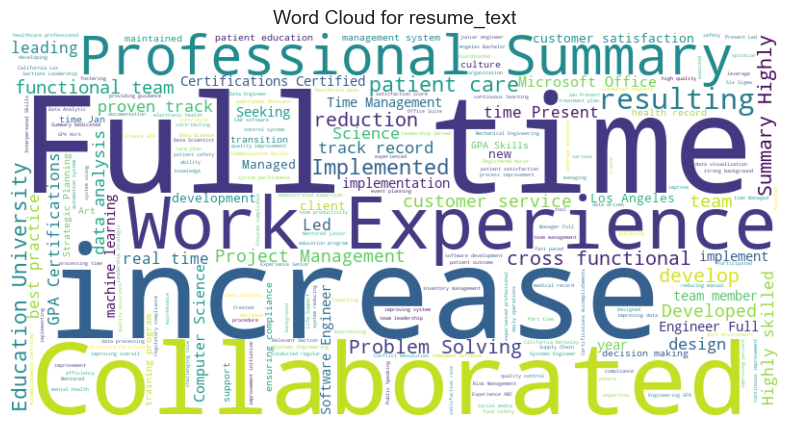

In [25]:
for col in text_columns:
    text_data = " ".join(temp[col])

    # Generate word cloud
    wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text_data)
    
    # Plot the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")  # Hide axes
    plt.title(f"Word Cloud for {col}", fontsize=14)
    plt.show()

## Analyzing Resume text

### No professional summary

In [26]:
no_prof_sum = df[~df['resume_text'].str.contains("Summary", case=False)].copy()
print("Number of resumes without professional summary:", no_prof_sum.shape[0])

Number of resumes without professional summary: 134


In [27]:
for i in range(no_prof_sum.shape[0]):
    print("Fit category:", no_prof_sum.iloc[i]['category'])
    print("Resume:\n", no_prof_sum.iloc[i]['resume_text'])
    print("\n================================================================================\n")

Fit category: Good Fit
Resume:
 **Jesus Johnson**
*Medical Laboratory Scientist*

**Objective**

Highly skilled and experienced Medical Laboratory Scientist with a proven track record in high-volume laboratory settings. Seeking to leverage extensive knowledge and expertise to contribute to the success of Memorial Health as a Medical Laboratory Scientist I.

**Education**

*University of California, Los Angeles*
*Bachelor of Science in Medical Laboratory Science*
*Graduation Year: 2012*
*GPA: 3.8*

**Skills**

Medical Laboratory Science, Medical Lab Scientist (ASCP) registration, High volume laboratory experience, Laboratory testing interpretation, Problem resolution, Trouble shooting, Physical effort, Data evaluation, Quality control, Analytical skills, Decision-making, Medical Laboratory Scientist I training, Laboratory data integration, Teaching materials preparation, Laboratory equipment maintenance, Laboratory instrument calibration, Specimen collection, Instrumentation theory, Ins

We can see that the resumes generated have professional summary present without a title

### No Skills

In [28]:
print("Number of resumes without skills word:", df[~df['resume_text'].str.contains("Skills", case=False)].shape[0])

Number of resumes without skills word: 0


All resumes have skills word, which is most probably skills section

### No Projects

In [29]:
print("Number of resumes without Projects word:", df[~df['resume_text'].str.contains("Projects", case=False)].shape[0])

no_proj = df[~df['resume_text'].str.contains("Projects", case=False)].copy()
no_proj

Number of resumes without Projects word: 451


,id,job_title,company,job_skills,job_summary,category,resume_text
3,866062,Master Scheduler,Baltimore Aircoil Company,"Operations, Supply Chain, MRP systems, SAP ERP...","Baltimore Aircoil Company (BAC), an Amsted Ind...",Overqualified,# Susan Bradley\n\n**Professional Summary**\n\...
18,818707,Materials Planner,Faraday Future,"SAP, MRP software, Excel, Word, PowerPoint, Ou...",The Company:\nFaraday Future (FF) is a Califor...,Good Fit,# James Fleming\n\n## Professional Summary\n\n...
46,491003,"Medical Assistant I - $2,000 Sign on bonus off...",Akron Children's Hospital,"Healthcare, Medical Assistant, Vital Signs, Ph...",About Akron Children’s Hospital\nAkron Childre...,Good Fit,# Clifford Cortez\n\n## Professional Summary\n...
59,1033211,Medical Laboratory Scientist I,Memorial Health,"Medical Laboratory Science, Medical Lab Scient...",Performs careful and accurate scientific work ...,Overqualified,# *Paul Mason*\n\n**Medical Laboratory Scienti...
78,243074,Mental Health Counselor (LCSW LPC LMFT),Gotham Enterprises Ltd,"Mental Health Counseling, Psychotherapy, Traum...",Full-time/Part-time Mental Health Counselor Po...,Good Fit,**Miranda Frazier**\n*Licensed Clinical Social...
...,...,...,...,...,...,...,...
1987,13071,ASSISTANT MANAGER,d'Lite Healthy On The Go,"Restaurant management, Leadership, Customer se...","Location: Scottsdale, AZ\nEmployment Type: Ful...",Overqualified,# *Kayla Davis*\n\n**Professional Summary**\n\...
1991,368698,Academic Advisor,Mount Allison University,"Academic advising, Transfer credit assessment,...",Position Description\nReporting to the Registr...,Overqualified,# *Sheena Chung*\n\n**Professional Summary**\n...
1992,440051,Account Executive Digital Sales,Salem Media Group,"Sales, Account Executive, Media Strategist, Bu...",Overview\nSalem Media - Washington D.C.\noffer...,Complete Mismatch,# Andrew Rasmussen\n\n## Professional Summary\...
1995,440051,Account Executive Digital Sales,Salem Media Group,"Sales, Account Executive, Media Strategist, Bu...",Overview\nSalem Media - Washington D.C.\noffer...,Overqualified,# Todd Walters\n\n**Professional Summary**\n\n...


In [30]:
for i in range(10):
    print("Fit category:", no_proj.iloc[i]['category'])
    print("Resume:\n", no_proj.iloc[i]['resume_text'])
    print("\n================================================================================\n")

Fit category: Overqualified
Resume:
 # Susan Bradley

**Professional Summary**

Highly skilled and experienced Supply Chain professional with over 15 years of expertise in operations and supply chain management. Demonstrated success in leading teams, driving process improvements, and implementing strategic initiatives resulting in significant cost savings and increased efficiency. Proven track record of managing complex supply chain operations, including master scheduling, production control, and manufacturing scheduling.

**Skills**

Operations, Supply Chain, MRP systems, SAP ERP system, Master scheduling, Production control, Manufacturing scheduling, Safety, Quality, Operations performance, Ownership, Urgency, Manufacturing schedules, Plant sales goals, Sales orders, Master schedule, Supply needs, Staffing needs, Work center, Load leveling, Bottleneck scheduling, Operations input, Output reporting, Sales & operations planning, Communication, Teamwork, Leadership, Capacity management,

Even though there are no Projects for these resumes, the resume has rich content in other sections (Except for some).

#### No work experience

In [31]:
#Check how many of these dont have any other sections
no_exp_proj = no_proj[~no_proj['resume_text'].str.contains("Work Experience", case=False)].copy()
no_exp_proj

,id,job_title,company,job_skills,job_summary,category,resume_text
192,340053,Nursery Manager,Savannah Tree Foundation,"Nursery Management, Horticulture, Arboricultur...",Nursery Manager\nReports to Executive Director...,Complete Mismatch,# Chelsea Patel\n\n## Professional Summary\n\n...
204,310546,Nursing Instructor,Hondros College of Nursing,"Nursing, Teaching, BLS Certification, Communic...",Full-Time Nursing Faculty - (MSN Required)\nHo...,Complete Mismatch,**Tammy Pena**\n\n**Professional Summary**\n\n...
480,1167340,Principal Engineer,Metropolitan Transportation Authority,"Engineering Principles, Budget Management, Pol...",Description\nThis position is eligible for tel...,Complete Mismatch,"**Deborah Thomas**\n*Address: 123 Main St, New..."
620,171303,Project Scheduler,The Haskell Company,"Primavera/P6, Time Impact Analysis (TIA), CPM ...",Overview\nAre you ready to move your career fo...,Complete Mismatch,# *Nicholas Gray*\n\n**Professional Summary**\...
795,336654,Registered Manager,Kare Plus Newcastle,"Business planning, Market research, Strategic ...",We are part of a Franchise called Kare Plus an...,Overqualified,# Cynthia Lewis\n\n## Professional Summary\n\n...
943,28545,Retail Sales Associate,"Verizon Authorized Retailer, TCC","Wireless Sales, Customer Service, Retail Sales...","Sales Associate - Verizon Authorized Retailer,...",Overqualified,**Timothy Rodriguez**\n\n**Professional Summar...
1140,297340,Senior Construction Inspector,"Metro Consulting Associates, LLC","Construction Management, Project Management, Q...",The Senior Construction Inspector is responsib...,Complete Mismatch,**Steven Lawrence**\n\n**Professional Summary*...
1316,29132,Senior Product Designer,BitGo,"Product Design, Digital Design, UserCentered D...",BitGo is the leader in digital asset financial...,Complete Mismatch,**Phillip Pope**\n\n**Professional Summary**\n...
1516,1061198,Specialist,"Orange and Rockland Utilities, Inc.","Clean Energy initiatives, NYPSC/NJBPU policy i...",Mission Statement\nConsolidated Edison Company...,Complete Mismatch,# *Ryan Fletcher*\n\n**Professional Summary**\...
1736,39657,Tax Senior Manager - Private Companies,PwC,"Strategy, Execution, Problem solving, Tax advi...",Specialty/Competency:\nEntrepreneurial & Priva...,Complete Mismatch,**James Munoz**\n\n**Professional Summary**\n\...


In [32]:
for i in range(no_exp_proj.shape[0]):
    print("Fit category:", no_exp_proj.iloc[i]['category'])
    print("Resume:\n", no_exp_proj.iloc[i]['resume_text'])
    print("\n================================================================================\n")

Fit category: Complete Mismatch
Resume:
 # Chelsea Patel

## Professional Summary

Highly experienced and dedicated professional with a background in mechanical engineering and project management, seeking to transition into a new field. Skilled in CAD software, product design, and team leadership, with a strong commitment to delivering high-quality results.

## Skills

Mechanical Engineering, CAD Software, Product Design, Project Management, Team Leadership, Communication, Problem-Solving, Time Management, Microsoft Office, AutoCAD, SolidWorks, CNC Programming, Quality Control, Manufacturing Processes, Geometric Dimensioning and Tolerancing, Risk Management, Cost Estimation, Supplier Management, Lean Manufacturing, Six Sigma, Kaizen, Value Stream Mapping, Process Improvement, Change Management, Strategic Planning, Business Development, Customer Relationship Management, Sales, Marketing, Financial Analysis, Budgeting, Forecasting, Data Analysis, Report Writing, Presentation Skills, Trai

### No work experience

In [33]:
no_exp = df[~df['resume_text'].str.contains("Work Experience", case=False)]
no_exp

,id,job_title,company,job_skills,job_summary,category,resume_text
192,340053,Nursery Manager,Savannah Tree Foundation,"Nursery Management, Horticulture, Arboricultur...",Nursery Manager\nReports to Executive Director...,Complete Mismatch,# Chelsea Patel\n\n## Professional Summary\n\n...
204,310546,Nursing Instructor,Hondros College of Nursing,"Nursing, Teaching, BLS Certification, Communic...",Full-Time Nursing Faculty - (MSN Required)\nHo...,Complete Mismatch,**Tammy Pena**\n\n**Professional Summary**\n\n...
368,1032588,Permanent Allied Health Professional - CT Tech...,St. Luke's Health System,"CT Technologist, Medical, Radiology, Patient C...",St. Luke's Health System is seeking a CT Techn...,Complete Mismatch,**Clinton Nelson**\n\n**Professional Summary**...
468,45721,Primary Care Physician,Peppes Pizza,"Primary Care Physician, Internal Medicine, Fam...",Description\nAbout Us\nOur mission is simple: ...,Complete Mismatch,# *Patrick Bell*\n\n**Professional Summary**\n...
480,1167340,Principal Engineer,Metropolitan Transportation Authority,"Engineering Principles, Budget Management, Pol...",Description\nThis position is eligible for tel...,Complete Mismatch,"**Deborah Thomas**\n*Address: 123 Main St, New..."
...,...,...,...,...,...,...,...
1828,633629,"Experienced Associate, Software Engineer (Pyth...",PwC,"Risk, Python, R, SAS, Java, C++/C#, SQL, Table...",Specialty/Competency:\nRisk\nIndustry/Sector:\...,Complete Mismatch,# *Ricky Mann*\n\n**Professional Summary**\n\n...
1832,315203,Data Analyst,Kforce Inc,"Power BI, SQL Server, SaaS, Cloud technologies...",Responsibilities\nKforce is partnered with a c...,Complete Mismatch,# *Marco Gonzalez*\n\n**Professional Summary**...
1848,453143,Sr. Software Engineer,Teledyne FLIR,"C/C++, Objectoriented design, Linux, Kernel sp...",Job Summary:\nWe are seeking a Sr. Software En...,Complete Mismatch,# Vicki Wright\n\n## Professional Summary\n\nD...
1884,815221,"Technical Lead, Software Engineering",Recruiting from Scratch,"Product Management, Software Development, Hard...",Who is Recruiting from Scratch:\nRecruiting fr...,Complete Mismatch,# Eric Miller\n\n## Professional Summary\n\nDe...


In [34]:
for i in range(no_exp.shape[0]):
    print("Fit category:", no_exp.iloc[i]['category'])
    print("Resume:\n", no_exp.iloc[i]['resume_text'])
    print("\n================================================================================\n")

Fit category: Complete Mismatch
Resume:
 # Chelsea Patel

## Professional Summary

Highly experienced and dedicated professional with a background in mechanical engineering and project management, seeking to transition into a new field. Skilled in CAD software, product design, and team leadership, with a strong commitment to delivering high-quality results.

## Skills

Mechanical Engineering, CAD Software, Product Design, Project Management, Team Leadership, Communication, Problem-Solving, Time Management, Microsoft Office, AutoCAD, SolidWorks, CNC Programming, Quality Control, Manufacturing Processes, Geometric Dimensioning and Tolerancing, Risk Management, Cost Estimation, Supplier Management, Lean Manufacturing, Six Sigma, Kaizen, Value Stream Mapping, Process Improvement, Change Management, Strategic Planning, Business Development, Customer Relationship Management, Sales, Marketing, Financial Analysis, Budgeting, Forecasting, Data Analysis, Report Writing, Presentation Skills, Trai

Work experience has other alternative names as Professional experience and Experience.
Any resume without work experience or project experience can be re-labelled as a bad fit.
We can also change the resume prompt template for the next set of generations to include another constraint.

## Resume Fit categories

For Complete Mismatch:


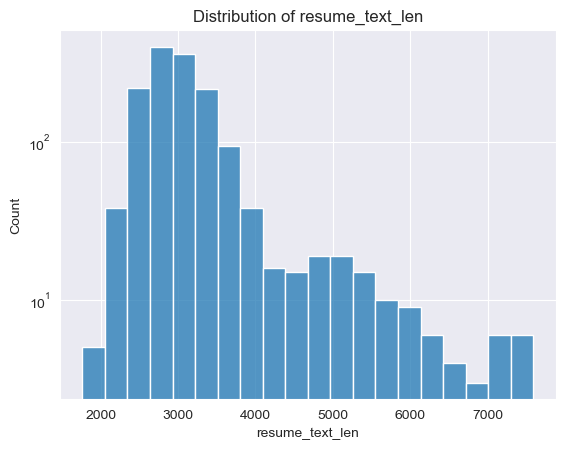

For Underwhelming:


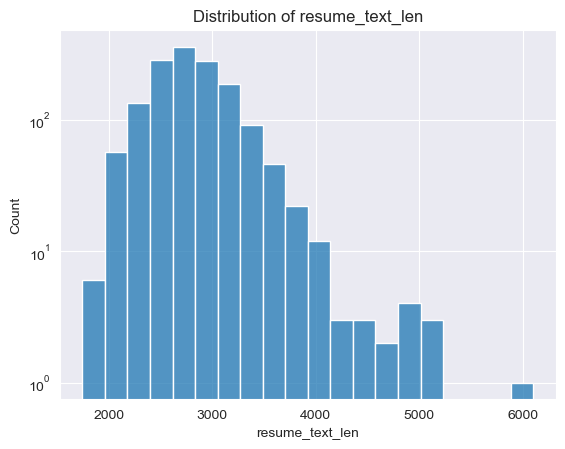

For Good Fit:


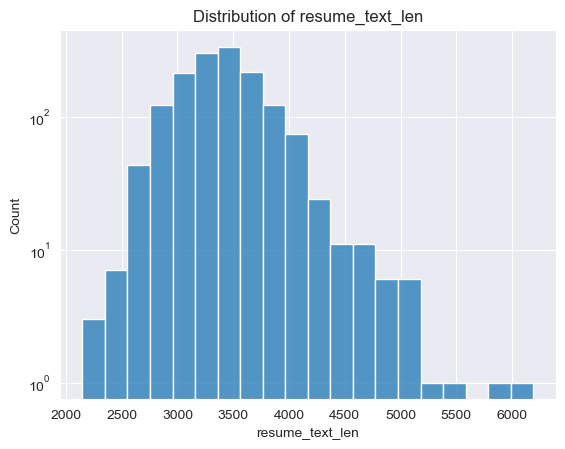

For Overqualified:


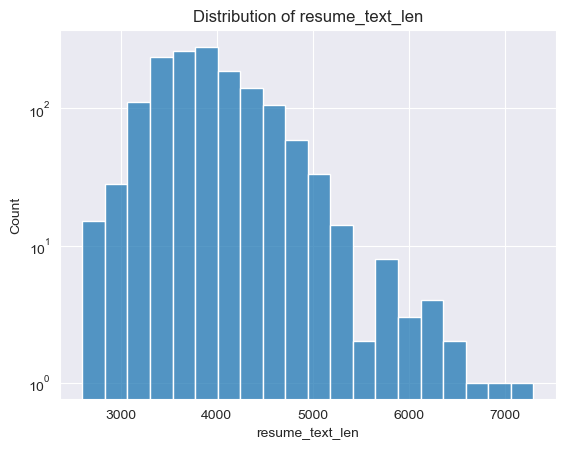

In [35]:
for i in df['category'].unique():
    print(f"For {i}:")
    plot_histogram(temp[temp['category'] == i], 'resume_text_len')

Observations:
- Most of the mismatch data belonged to healthcare background because of the example given in category requirements. (~180 of the 500 have the word patient or healthcare)
- Other categories seem to have robust synthetic data generations.
- Some text generations do not have either Projects or Work experience sections and only have skills listed. For this use case, the advantage is that we can re-label them as Bad fit category from their original label. However, adjusted the prompt for next set of generations.

In [36]:
# No projects or experience - category label must be "Bad fit"
cond1 = df['resume_text'].str.contains("Work Experience", case=False)
cond2 = df['resume_text'].str.contains("**Experience", regex=False)
cond3 = df['resume_text'].str.contains("**PROFESSIONAL EXPERIENCE", regex=False)
cond4 = df['resume_text'].str.contains("**EXPERIENCE", regex=False)
cond5 = df['resume_text'].str.contains("Projects", regex=False)

In [37]:
special_cases1 = df[~(cond1 | cond2 | cond3 | cond4 | cond5)].copy()
special_cases1

,id,job_title,company,job_skills,job_summary,category,resume_text
192,340053,Nursery Manager,Savannah Tree Foundation,"Nursery Management, Horticulture, Arboricultur...",Nursery Manager\nReports to Executive Director...,Complete Mismatch,# Chelsea Patel\n\n## Professional Summary\n\n...
204,310546,Nursing Instructor,Hondros College of Nursing,"Nursing, Teaching, BLS Certification, Communic...",Full-Time Nursing Faculty - (MSN Required)\nHo...,Complete Mismatch,**Tammy Pena**\n\n**Professional Summary**\n\n...
368,1032588,Permanent Allied Health Professional - CT Tech...,St. Luke's Health System,"CT Technologist, Medical, Radiology, Patient C...",St. Luke's Health System is seeking a CT Techn...,Complete Mismatch,**Clinton Nelson**\n\n**Professional Summary**...
468,45721,Primary Care Physician,Peppes Pizza,"Primary Care Physician, Internal Medicine, Fam...",Description\nAbout Us\nOur mission is simple: ...,Complete Mismatch,# *Patrick Bell*\n\n**Professional Summary**\n...
480,1167340,Principal Engineer,Metropolitan Transportation Authority,"Engineering Principles, Budget Management, Pol...",Description\nThis position is eligible for tel...,Complete Mismatch,"**Deborah Thomas**\n*Address: 123 Main St, New..."
620,171303,Project Scheduler,The Haskell Company,"Primavera/P6, Time Impact Analysis (TIA), CPM ...",Overview\nAre you ready to move your career fo...,Complete Mismatch,# *Nicholas Gray*\n\n**Professional Summary**\...
720,728272,RN - ICU,SSM Health,"Nursing, Medicalsurgical nursing, Healthcare, ...","It's more than a career, it's a calling\nMO-SS...",Complete Mismatch,**Michele Martin**\n\n**Professional Summary**...
795,336654,Registered Manager,Kare Plus Newcastle,"Business planning, Market research, Strategic ...",We are part of a Franchise called Kare Plus an...,Overqualified,# Cynthia Lewis\n\n## Professional Summary\n\n...
943,28545,Retail Sales Associate,"Verizon Authorized Retailer, TCC","Wireless Sales, Customer Service, Retail Sales...","Sales Associate - Verizon Authorized Retailer,...",Overqualified,**Timothy Rodriguez**\n\n**Professional Summar...
1140,297340,Senior Construction Inspector,"Metro Consulting Associates, LLC","Construction Management, Project Management, Q...",The Senior Construction Inspector is responsib...,Complete Mismatch,**Steven Lawrence**\n\n**Professional Summary*...


In [38]:
special_cases2 = df[~cond5].copy()
special_cases2

,id,job_title,company,job_skills,job_summary,category,resume_text
3,866062,Master Scheduler,Baltimore Aircoil Company,"Operations, Supply Chain, MRP systems, SAP ERP...","Baltimore Aircoil Company (BAC), an Amsted Ind...",Overqualified,# Susan Bradley\n\n**Professional Summary**\n\...
18,818707,Materials Planner,Faraday Future,"SAP, MRP software, Excel, Word, PowerPoint, Ou...",The Company:\nFaraday Future (FF) is a Califor...,Good Fit,# James Fleming\n\n## Professional Summary\n\n...
19,818707,Materials Planner,Faraday Future,"SAP, MRP software, Excel, Word, PowerPoint, Ou...",The Company:\nFaraday Future (FF) is a Califor...,Overqualified,# Laura Paul\n\n## Professional Summary\n\nHig...
46,491003,"Medical Assistant I - $2,000 Sign on bonus off...",Akron Children's Hospital,"Healthcare, Medical Assistant, Vital Signs, Ph...",About Akron Children’s Hospital\nAkron Childre...,Good Fit,# Clifford Cortez\n\n## Professional Summary\n...
51,1087740,Medical Lab Scientist,System One,"Medical Lab Scientist, Clinical Laboratory Sci...",Job Title\n: Medical Lab Scientist\nLocation\n...,Overqualified,# *Jessica Bray*\n\n**Professional Summary**\n...
...,...,...,...,...,...,...,...
1987,13071,ASSISTANT MANAGER,d'Lite Healthy On The Go,"Restaurant management, Leadership, Customer se...","Location: Scottsdale, AZ\nEmployment Type: Ful...",Overqualified,# *Kayla Davis*\n\n**Professional Summary**\n\...
1991,368698,Academic Advisor,Mount Allison University,"Academic advising, Transfer credit assessment,...",Position Description\nReporting to the Registr...,Overqualified,# *Sheena Chung*\n\n**Professional Summary**\n...
1992,440051,Account Executive Digital Sales,Salem Media Group,"Sales, Account Executive, Media Strategist, Bu...",Overview\nSalem Media - Washington D.C.\noffer...,Complete Mismatch,# Andrew Rasmussen\n\n## Professional Summary\...
1995,440051,Account Executive Digital Sales,Salem Media Group,"Sales, Account Executive, Media Strategist, Bu...",Overview\nSalem Media - Washington D.C.\noffer...,Overqualified,# Todd Walters\n\n**Professional Summary**\n\n...


## Modifying labels as Good fit/ Bad fit

In [39]:
df['label'] = df['category']

## Cosine similarity for text columns

In [40]:
def get_similarity_percentage(col_data, threshold=0.3):
    # Create TF-IDF vectors
    vectorizer = TfidfVectorizer()
    tfidf_matrix = vectorizer.fit_transform(col_data)
    
    # Compute cosine similarity
    cosine_sim = cosine_similarity(tfidf_matrix)
    
    # Count number of instances where similarity > threshold (excluding self-matches)
    num_instances = np.sum(cosine_sim > threshold) - len(cosine_sim)  # Exclude diagonal (self-similarity)
    
    # Total possible comparisons excluding diagonal
    total_comparisons = cosine_sim.shape[0] * (cosine_sim.shape[1] - 1)  # n * (n-1)
    total_unique_comparisons = total_comparisons // 2
    
    # Calculate percentage
    percentage_instances = (num_instances / total_unique_comparisons) * 100
    
    return percentage_instances

In [41]:
threshold = 0.3
print(f"Percentage of Resume text that are similar with each other (cosine similarity > {threshold}) are: ", get_similarity_percentage(df['resume_text'], threshold))

Percentage of Resume text that are similar with each other (cosine similarity > 0.3) are:  9.816180474523533


## Eliminating possible fit category mentions in the synthetic data

In [42]:
df.loc[~(cond1 | cond2 | cond3 | cond4 | cond5), 'label'] = 'Complete Mismatch'
df['label'].value_counts()

label
Complete Mismatch    1518
Underwhelming        1499
Good Fit             1498
Overqualified        1485
Name: count, dtype: int64

In [43]:
# Function to remove lines containing a specific string (case-insensitive)
def remove_lines_case_insensitive(text, target_string):
    return "\n".join([
        line for line in text.split("\n") if target_string.lower() not in line.lower()
    ])

def remove_overqualified_string(text):
    return "\n".join(text.split("\n")[:-2])

In [44]:
# # Remove lines containing Complete mismatch, Underwhelming and GoodFit
df['resume_data'] = df['resume_text'].apply(lambda x: remove_lines_case_insensitive(x, "Complete Mismatch"))
df['resume_data'] = df['resume_data'].apply(lambda x: remove_lines_case_insensitive(x, "Underwhelming"))
df['resume_data'] = df['resume_data'].apply(lambda x: remove_lines_case_insensitive(x, "Good Fit"))

# Remove occurrences when Overqualified appears at the end as part of metadata
df['resume_data'] = df['resume_data'].apply(lambda x: remove_overqualified_string(x))

In [45]:
df['id'].nunique()

1500

In [46]:
df['job_data'] = df['job_title'] + '\n' + df['job_summary'] + '\n' + df['job_skills']

## Saving the data

In [47]:
required_data = df[['job_data', 'resume_data', 'label']].copy()
required_data.to_csv(f"{path}/data/synthetic_data/synthetic_data_v1.csv", index=False)